In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset

nc_file = '../cloud_results.nc'

# print all variables
with Dataset(nc_file, 'r') as dataset:
    for var in dataset.variables:
        print(f"{var}: shape = {dataset.variables[var].shape}")

size: shape = (54, 6)
location_x: shape = (54, 6)
location_y: shape = (54, 6)
location_z: shape = (54, 6)


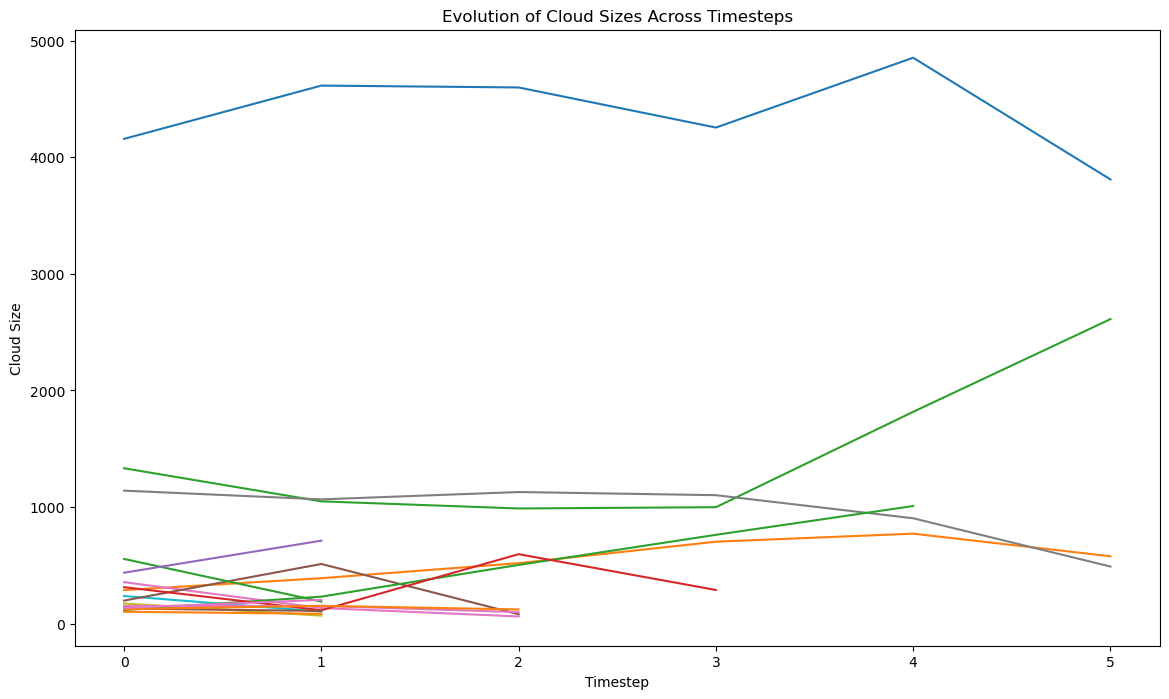

[[4158.0 288.0 1333.0 80.0 63.0 96.0 356.0 1141.0 173.0 237.0 321.0 71.0
  89.0 93.0 61.0 198.0 54.0 107.0 89.0 51.0 74.0 79.0 117.0 313.0 95.0
  113.0 115.0 54.0 104.0 132.0 114.0 102.0 197.0 75.0 52.0 130.0 152.0
  901.0 56.0 99.0 55.0 125.0 555.0 173.0 437.0 89.0 136.0 55.0 109.0
  410.0 85.0 99.0 1474.0 51.0]
 [4615.0 390.0 1049.0 -- -- -- 134.0 1066.0 69.0 104.0 -- -- -- -- --
  512.0 -- -- -- -- -- -- 232.0 115.0 -- -- -- -- -- -- -- 85.0 -- -- --
  109.0 152.0 -- -- -- -- 153.0 190.0 -- 712.0 -- 204.0 -- -- -- -- -- --
  --]
 [4599.0 519.0 988.0 -- -- -- 62.0 1129.0 -- -- -- -- -- -- -- 81.0 -- --
  -- -- -- -- 504.0 596.0 -- -- -- -- -- -- -- -- -- -- -- -- 99.0 -- --
  -- -- 122.0 -- -- -- -- -- -- -- -- -- -- -- --]
 [4255.0 703.0 999.0 -- -- -- -- 1102.0 -- -- -- -- -- -- -- -- -- -- --
  -- -- -- 762.0 289.0 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- --]
 [4854.0 772.0 1817.0 -- -- -- -- 904.0 -- -- -- -- -- -- -- -- -- -- --
  

In [14]:
# Load the NetCDF file
  # Adjust the path accordingly
dataset = Dataset(nc_file, 'r')

# Read cloud sizes, assuming variable name is 'size' with dimensions ('cloud', 'timestep')
cloud_sizes = dataset.variables['size'][:].T  # Transpose if necessary to match ('timestep', 'cloud')

# Number of timesteps and clouds
num_timesteps = cloud_sizes.shape[0]
num_clouds = cloud_sizes.shape[1]

# Generate a plot for each cloud
plt.figure(figsize=(14, 8))

for cloud_idx in range(num_clouds):
    # Extract size evolution for this cloud
    size_evolution = cloud_sizes[:, cloud_idx]
    
    # Plot the evolution
    plt.plot(range(num_timesteps), size_evolution, label=f'Cloud {cloud_idx+1}')

plt.xlabel('Timestep')
plt.ylabel('Cloud Size')
plt.title('Evolution of Cloud Sizes Across Timesteps')
#plt.legend()
plt.show()

# Close the dataset after use
dataset.close()

print (cloud_sizes)

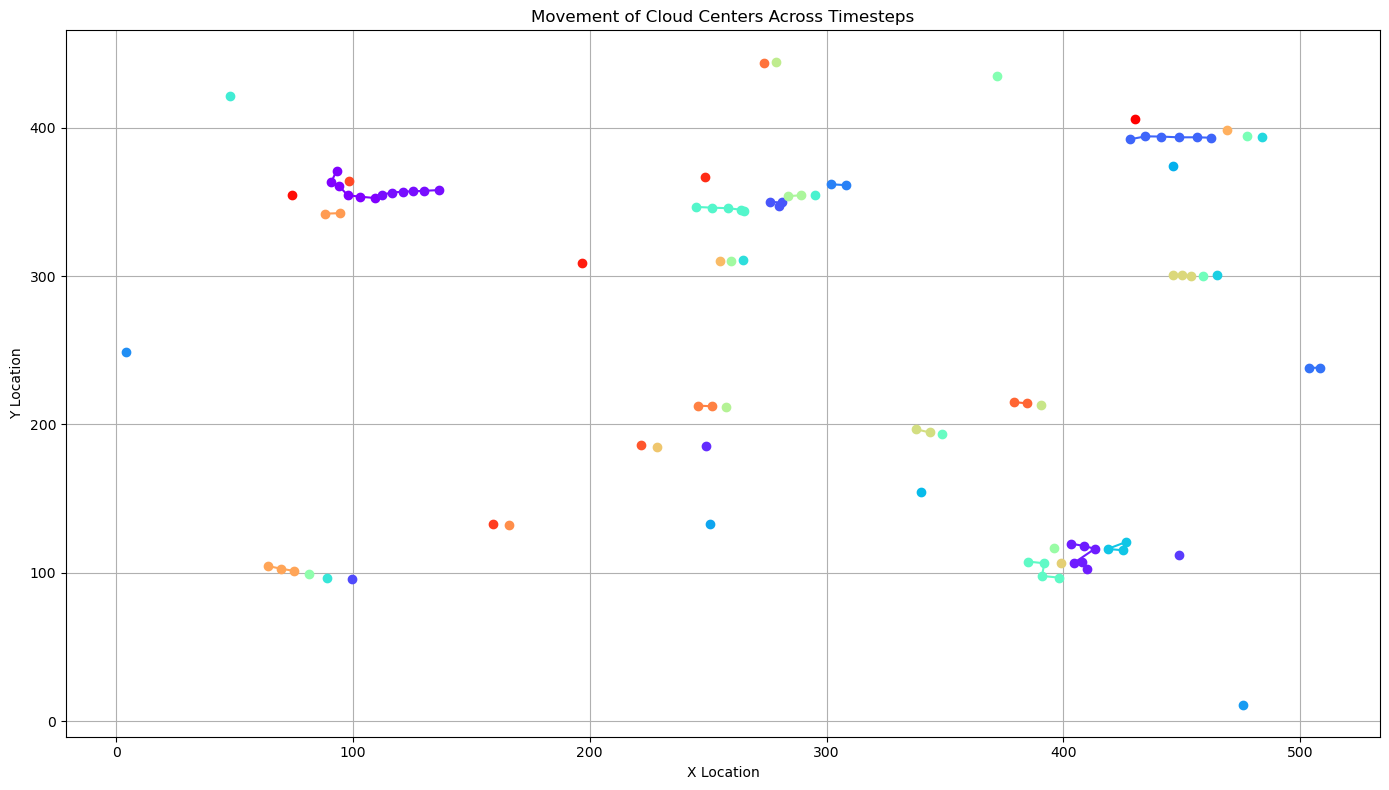

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
import matplotlib.cm as cm

# Load the NetCDF file
nc_file = '../cloud_results.nc'  # Update this path to your actual NetCDF file location
dataset = Dataset(nc_file, 'r')

# Reading cloud center locations with correct dimensions
x_centers = dataset.variables['location_x'][:]  # shape should now be (clouds, timesteps)
y_centers = dataset.variables['location_y'][:]  # shape should now be (clouds, timesteps)

# Number of clouds and timesteps
num_clouds, num_timesteps = x_centers.shape

# Generate a color map for clouds
colors = cm.rainbow(np.linspace(0, 1, num_clouds))

# Plot for cloud center movements
plt.figure(figsize=(14, 8))

for cloud_idx in range(num_clouds):
    # Filter out NaN values for x and y centers
    valid_idx = ~np.isnan(x_centers[cloud_idx, :]) & ~np.isnan(y_centers[cloud_idx, :])
    if np.any(valid_idx):  # Check if there are any valid points to plot for this cloud
        plt.plot(x_centers[cloud_idx, valid_idx], y_centers[cloud_idx, valid_idx], '-o', color=colors[cloud_idx], label=f'Cloud {cloud_idx+1}')

plt.xlabel('X Location')
plt.ylabel('Y Location')
plt.title('Movement of Cloud Centers Across Timesteps')
plt.grid(True)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

# Close the dataset after use
dataset.close()
